In [12]:
import numpy as np
import pandas as pd

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [14]:
#pip install plotly

In [15]:
df=pd.read_csv("house_data.csv")

In [16]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [18]:
df.shape

(21613, 21)

In [19]:
df.isnull().sum().sort_values(ascending=False)

id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

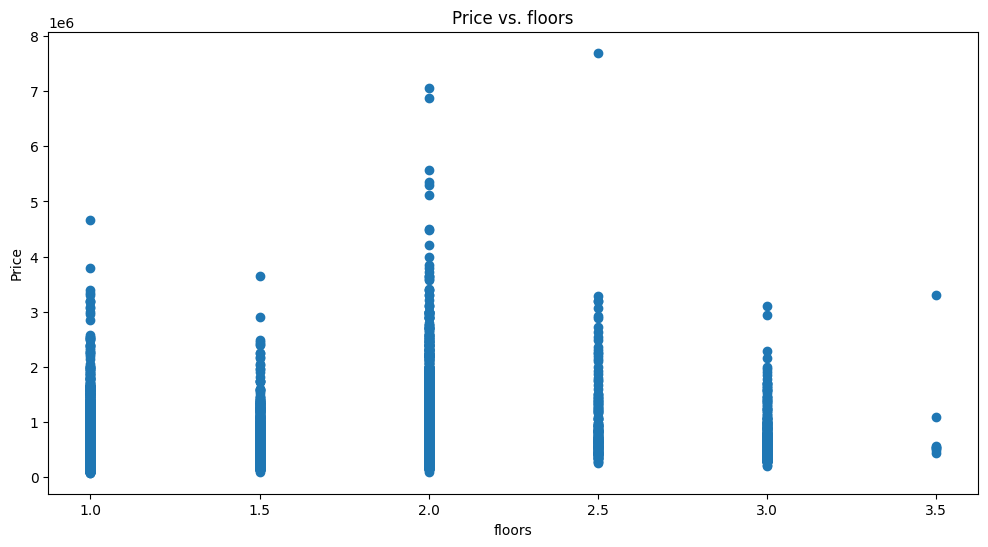

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(df['floors'], df['price'])
plt.title('Price vs. floors')
plt.xlabel('floors')
plt.ylabel('Price')
plt.show()

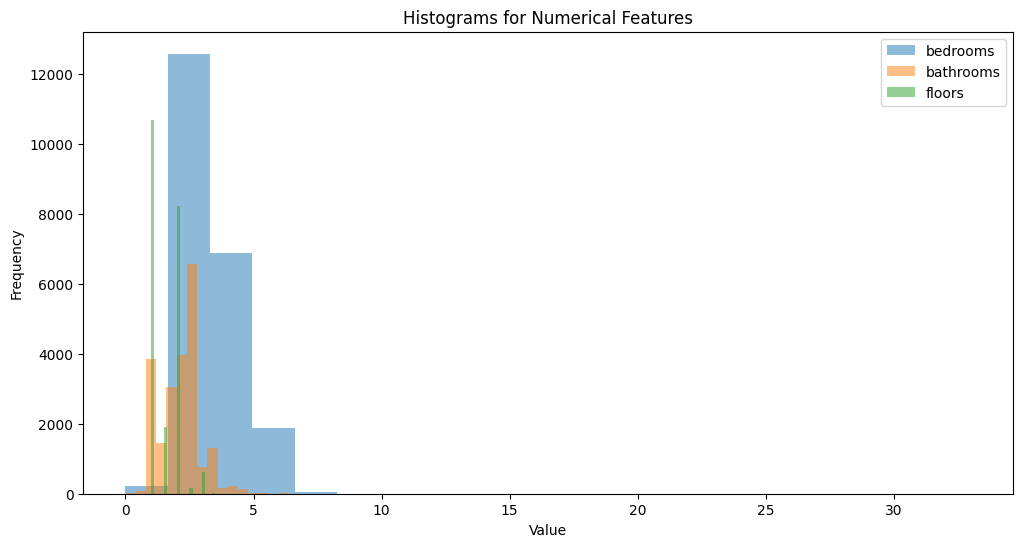

In [21]:
plt.figure(figsize=(12, 6))
plt.hist(df['bedrooms'], bins=20, alpha=0.5, label='bedrooms')
plt.hist(df['bathrooms'], bins=20, alpha=0.5, label='bathrooms')
plt.hist(df['floors'], bins=20, alpha=0.5, label='floors')
plt.title('Histograms for Numerical Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

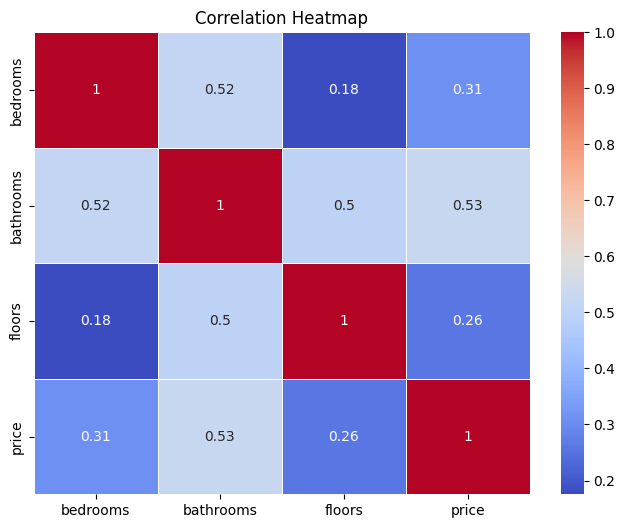

In [22]:
import seaborn as sns

numerical_features = ['bedrooms', 'bathrooms', 'floors', 'price']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

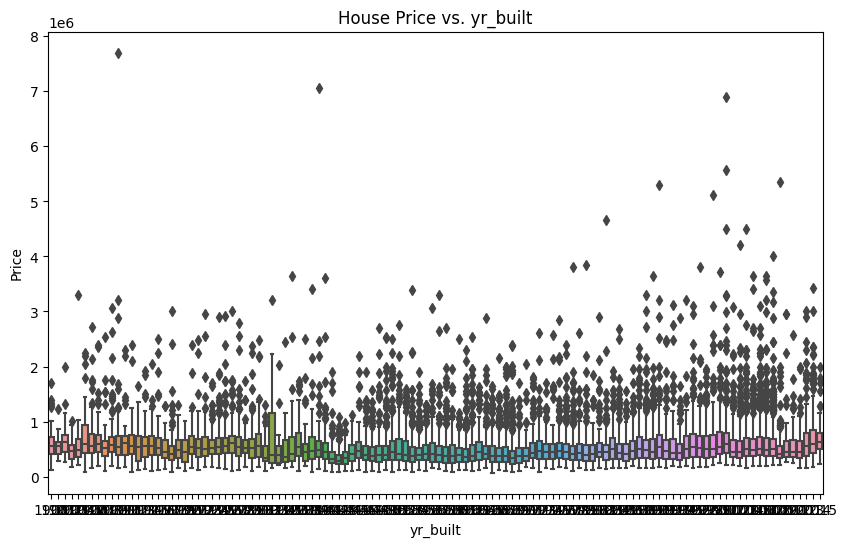

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='yr_built', y='price', data=df)
plt.title('House Price vs. yr_built')
plt.xlabel('yr_built')
plt.ylabel('Price')
plt.show()

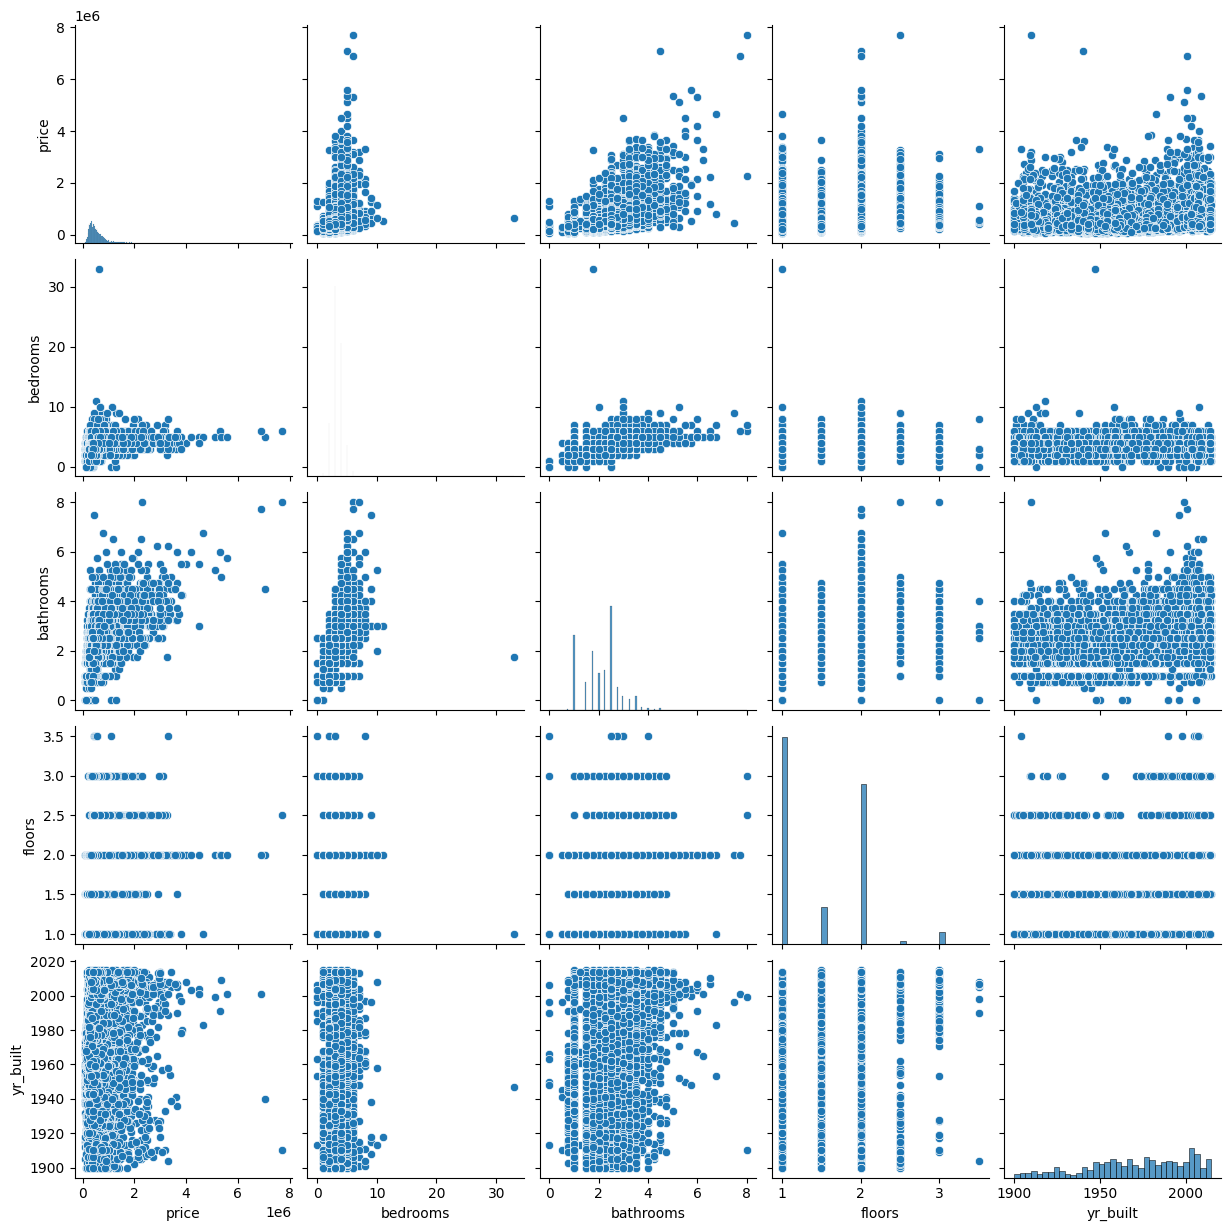

In [24]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'floors','yr_built']])
plt.show()

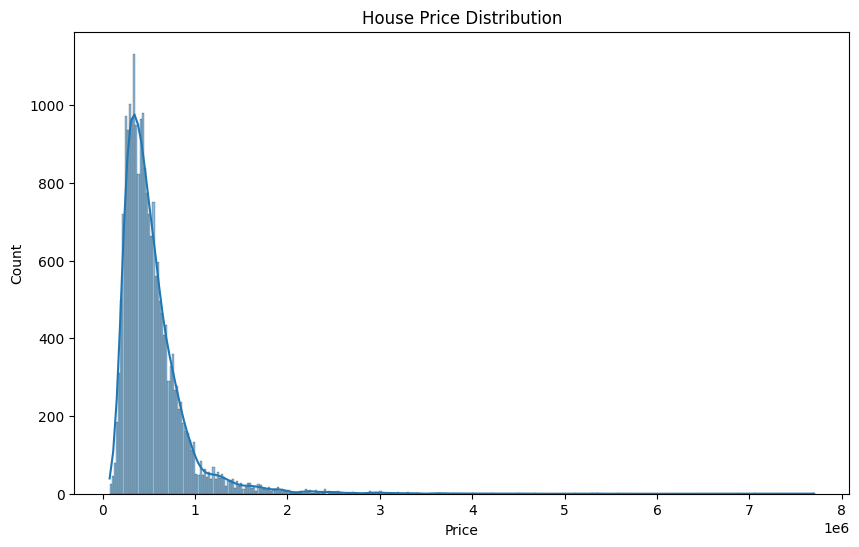

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [81]:
selected_features = ['bedrooms', 'bathrooms', 'floors']

X = df[selected_features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Use Linear Regression

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [84]:
y_pred_train = model.predict(X_train)

In [85]:
y_pred_test = model.predict(X_test)

In [86]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [87]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [88]:
print("Mean Squared Error (MSE) - Train: {:.2f}, Test: {:.2f}".format(mse_train, mse_test))
print("R-squared (R2) - Train: {:.2f}, Test: {:.2f}".format(r2_train, r2_test))

Mean Squared Error (MSE) - Train: 100765037125.74, Test: 87231520352.59
R-squared (R2) - Train: 0.28, Test: 0.26


Use random forest

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [91]:
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [92]:
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

In [93]:
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

In [94]:
print("Random Forest Model:")
print("Mean Squared Error (MSE) - Train: {:.2f}, Test: {:.2f}".format(mse_train_rf, mse_test_rf))
print("R-squared (R2) - Train: {:.2f}, Test: {:.2f}".format(r2_train_rf, r2_test_rf))

Random Forest Model:
Mean Squared Error (MSE) - Train: 77347010939.73, Test: 78180278941.19
R-squared (R2) - Train: 0.45, Test: 0.34


model for prediction

In [95]:
import joblib 

model_filename = 'model.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to model.pkl


In [43]:
# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


threshold = 0.5

y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train_class)


y_pred_class = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test_class, y_pred_class)
classification_report_result = classification_report(y_test_class, y_pred_class)

print("Accuracy: {:.2f}".format(accuracy))
print("Classification Report:\n", classification_report_result)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      5404

    accuracy                           1.00      5404
   macro avg       1.00      1.00      1.00      5404
weighted avg       1.00      1.00      1.00      5404

